In [182]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 17,6

import warnings
warnings.filterwarnings("ignore")

In [183]:
report2015 = pd.read_csv('2015.csv')
report2015['Year'] = 2015
report2016 = pd.read_csv('2016.csv')
report2016['Year'] = 2016
report2017 = pd.read_csv('2017.csv')
report2017['Year'] = 2017
report2018 = pd.read_csv('2018.csv')
report2018['Year'] = 2018
report2019 = pd.read_csv('2019.csv')
report2019['Year'] = 2019

In [184]:
#Приведём столбцы к общему виду для каждого "года"

report2017 = report2017.rename(columns = {
    'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score', 
    'Whisker.high':'Upper Confidence Interval', 'Whisker.low':'Lower Confidence Interval', 
    'Dystopia.Residual':'Dystopia Residual', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 
    'Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)'
})

report2018 = report2018.rename(columns = {
    'Score':'Happiness Score', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)', 'Country or region': 'Country'
})
report2019 = report2019.rename(columns = {
    'Score':'Happiness Score', 'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})

#Смержим таблицы и Заполним регионы для стран, где они пропущены. Страны где регион отсутствует удалим:

df = pd.concat([report2015, report2016, report2017, report2018, report2019])
df = df.drop(['Lower Confidence Interval',
              'Upper Confidence Interval', 
              'Standard Error'], axis=1).reset_index().drop(['index'], axis=1) #Для ДЗ этими данными можно пренебречь :)

def find_region(country_frame_string):    
    if type(country_frame_string['Region']) == str:
        global region
        region = country_frame_string['Region']

def empty_region(df_string): #Не самый красивый код, точно можно было проще)
    global region
    region = ''
    global df
    if type(df_string['Region']) == float:
        country_frame = df[df['Country'] == df_string['Country']]
        country_frame.apply(find_region, axis=1)
        
        if region == '':
            df.drop(df[df.Country == df_string['Country']].index, inplace=True)
        else:
            country_frame.Region = region
            df.drop(df[df.Country == df_string['Country']].index, inplace=True)
            df = pd.concat([df, country_frame])
            
#Сделаем более читаемый порядок столбцов

cols = ['Country',
 'Region',
 'Year',
 'Happiness Score',
 'Happiness Rank',
 'Freedom',
 'Family',
 'Generosity',
 'Dystopia Residual',
 'Health (Life Expectancy)',
 'Economy (GDP per Capita)',
 'Trust (Government Corruption)']
df = df[cols]

In [185]:
df.apply(empty_region, axis=1)
df = df.sort_values(by=['Year', 'Happiness Rank'])
df.head()

,Country,Region,Year,Happiness Score,Happiness Rank,Freedom,Family,Generosity,Dystopia Residual,Health (Life Expectancy),Economy (GDP per Capita),Trust (Government Corruption)
0,Switzerland,Western Europe,2015,7.587,1,0.66557,1.34951,0.29678,2.51738,0.94143,1.39651,0.41978
1,Iceland,Western Europe,2015,7.561,2,0.62877,1.40223,0.43630,2.70201,0.94784,1.30232,0.14145
2,Denmark,Western Europe,2015,7.527,3,0.64938,1.36058,0.34139,2.49204,0.87464,1.32548,0.48357
3,Norway,Western Europe,2015,7.522,4,0.66973,1.33095,0.34699,2.46531,0.88521,1.45900,0.36503
4,Canada,North America,2015,7.427,5,0.63297,1.32261,0.45811,2.45176,0.90563,1.32629,0.32957


### Задание:

###### scatterplot

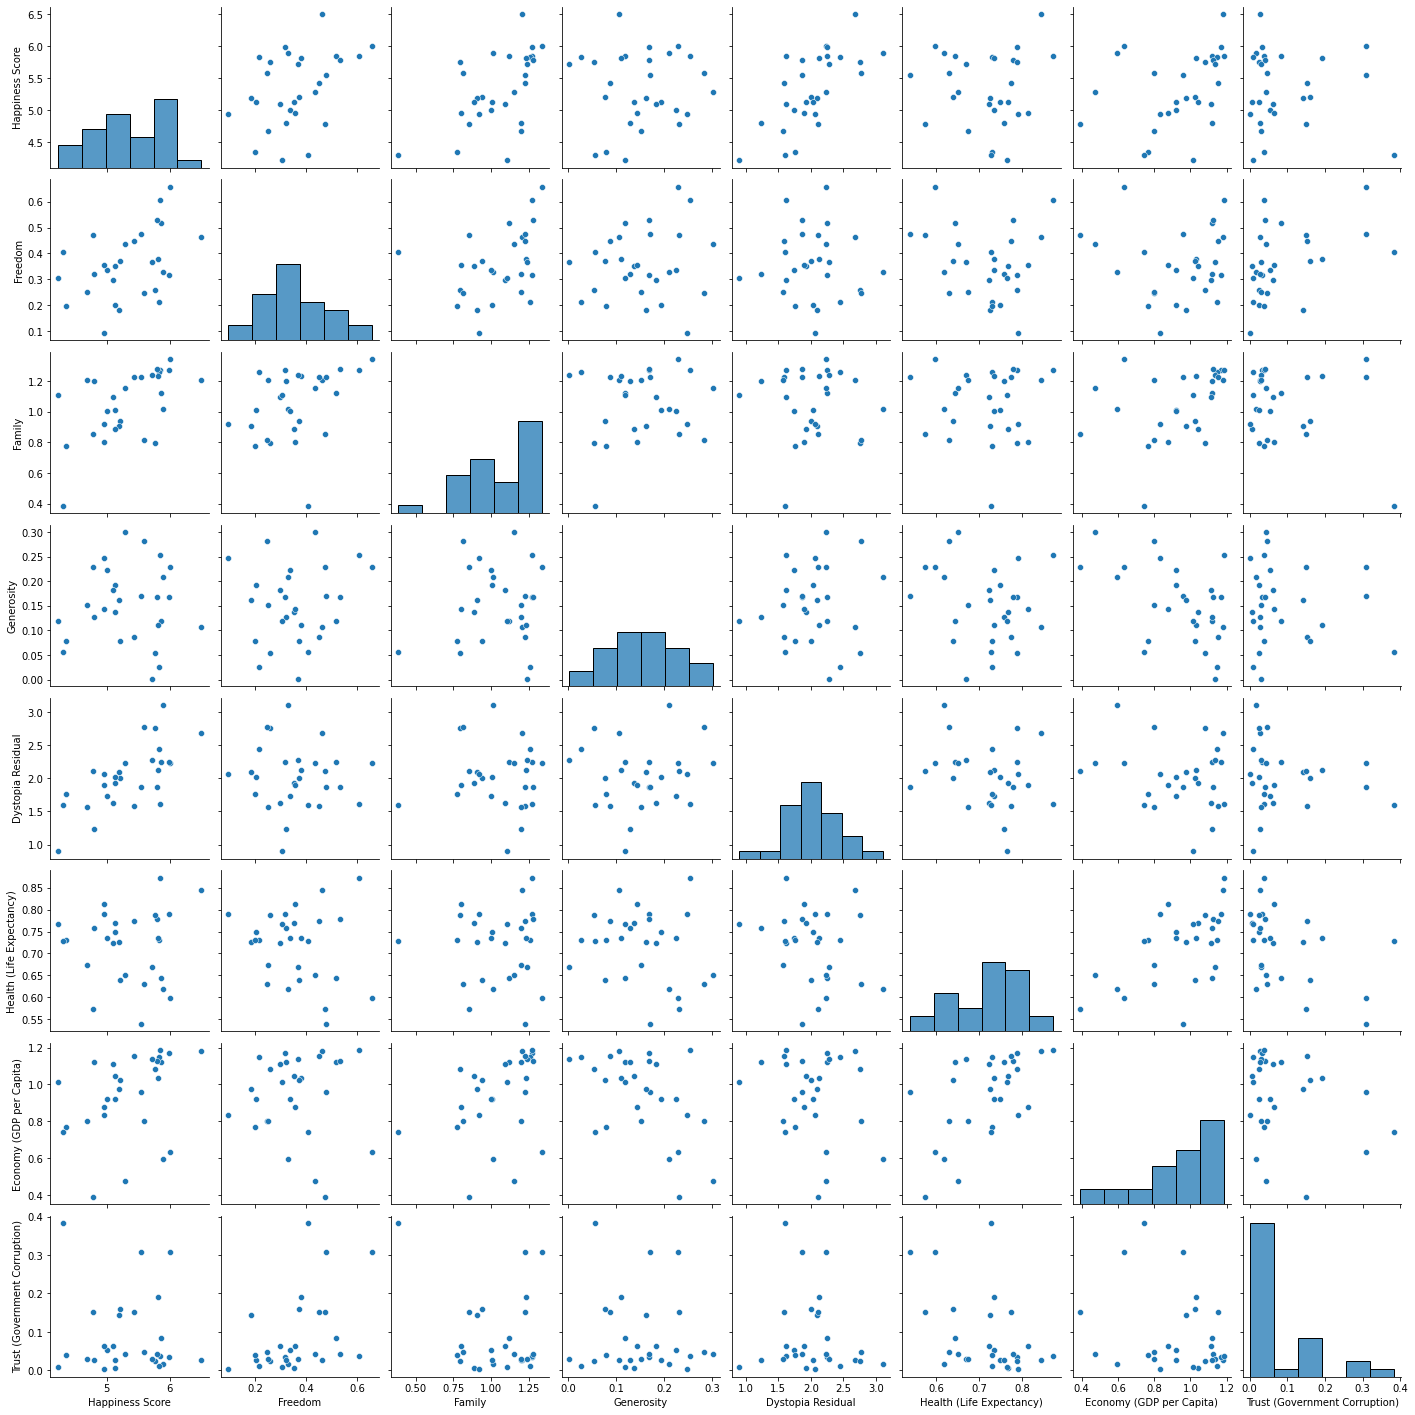

In [186]:
#Построим общую диаграмму зависимости показателей для стран центральной и восточной Европы в 2015 году

sns.pairplot(df[(df.Region == 'Central and Eastern Europe')&(df.Year == 2015)][['Happiness Score', 
                    'Freedom', 'Family', 'Generosity', 'Dystopia Residual',
                    'Health (Life Expectancy)', 'Economy (GDP per Capita)', 'Trust (Government Corruption)']])

На графиках можно увидеть линейную зависимость между индексом "Freedom" и общей оценкой показателя счастья, что логично.
Такие же зависимости есть между показателями ВВП на душу населения и индекса "Здоровья". Между показателем социального индекса и общим показателем счастья.

В выбранных странах видим смещение показателя коррупции в сторону низких значений (кто бы сомневался), а также общего показателя счастья. При этом показатели ВВП и социальной сферы, наоборот, смещены больше к средне-высоким значениям. Несмотря на то что относительно всех стран в дата сете эти значения всё равно не дотягивают до топовых показателей других стран.

Остальные значения в целом имеют относительно нормальное распределение. Значения не сосредоточены по углам и расположены достаточно широко относительно друг друга. Что может говорит о разнообразии значений внутри группы (есть как страны с достаточно высокими показателями по группам и общим индексом, так и страны со значительно менее оптимистичными цифрами), несмотря на то, что они находятся в одном условном регионе.

###### scatterplot

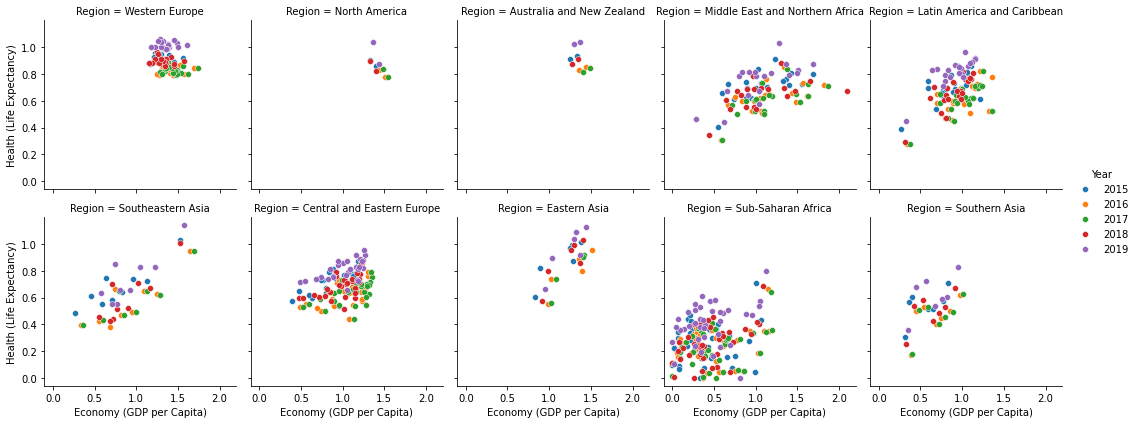

In [187]:
grid = sns.FacetGrid(df, col='Region', hue='Year', col_wrap=5)
grid.map(sns.scatterplot, 'Economy (GDP per Capita)', 'Health (Life Expectancy)')
grid.add_legend()

Из графика видна прямая зависимость между показателем ВВП экономики страны и ожидаемой продолжительностью жизни в стране.

При этом в странах Азии, Африки и Латинской америки визуализации более "размыты", что говорит о разном уровне экономики и ожидаемой продолжиительности жизни

Также видно, что от года к году ожидаемая проолжительность жизни расла почти по всем регионам планеты (для азиатских стран этот тренд не так очевиден).

###### boxplot

Количество стран по регионам 103


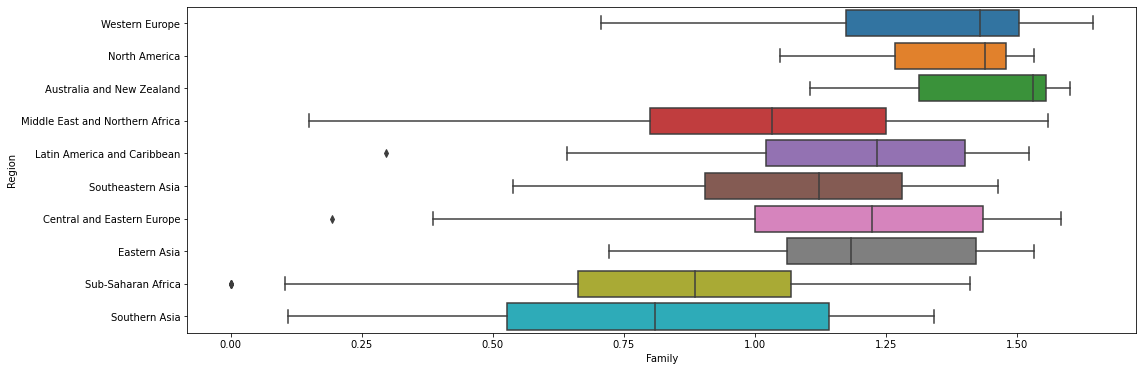

In [188]:
sns.boxplot(x='Family', y='Region', orient='h', data=df)
print('Количество стран по регионам', len(df[df['Region'] == 'Western Europe']))

Исходя из описания на официальном сайте, ( https://worldhappiness.report/ ) столбец family отражает уровень поддержки государством гражан в социальной сфере. 

Boxplot кажется не лучшее представление этого показателя в разрезе регионов, но хотелось посторить именно его :) 

В целом видим, что уровень социальной поддержки в странах африки и азии ниже, чем в европейских странах (+Австралия и Новая Зеландия) или даже в странах  северной и Латинской Америки.

При этом для некоторых регионов видим наличие стран, уровень социальной поддержки в которых значительно меньше среднего по региону (отражается как "Выброс"). Например, для стран центральной и восточной Европы это будет Грузия:

In [189]:
df[(df.Region == 'Central and Eastern Europe')&(df.Family < 0.25)]

,Country,Region,Year,Happiness Score,Happiness Rank,Freedom,Family,Generosity,Dystopia Residual,Health (Life Expectancy),Economy (GDP per Capita),Trust (Government Corruption)
283,Georgia,Central and Eastern Europe,2016,4.252,126,0.32461,0.19249,0.06786,1.87031,0.64035,0.83792,0.3188


###### heatmap

In [190]:
freedom_by_years = df.pivot_table(
                        index='Region', 
                        columns='Year', 
                        values='Freedom', 
                        aggfunc='mean').fillna(0)
freedom_by_years

Year,2015,2016,2017,2018,2019
Region,,,,,
Australia and New Zealand,0.645310,0.574920,0.607835,0.658000,0.571000
Central and Eastern Europe,0.358269,0.300528,0.346609,0.398241,0.357964
Eastern Asia,0.462490,0.387282,0.407620,0.455167,0.372167
Latin America and Caribbean,0.501740,0.426646,0.449222,0.502190,0.438500
Middle East and Northern Africa,0.361751,0.309769,0.363768,0.389474,0.317947
North America,0.589505,0.527665,0.558421,0.600000,0.519000
Southeastern Asia,0.557104,0.490123,0.534971,0.591667,0.543778
Southern Asia,0.373337,0.350026,0.398971,0.455714,0.386286
Sub-Saharan Africa,0.365944,0.315424,0.354104,0.394487,0.336205


<AxesSubplot:xlabel='Year', ylabel='Region'>

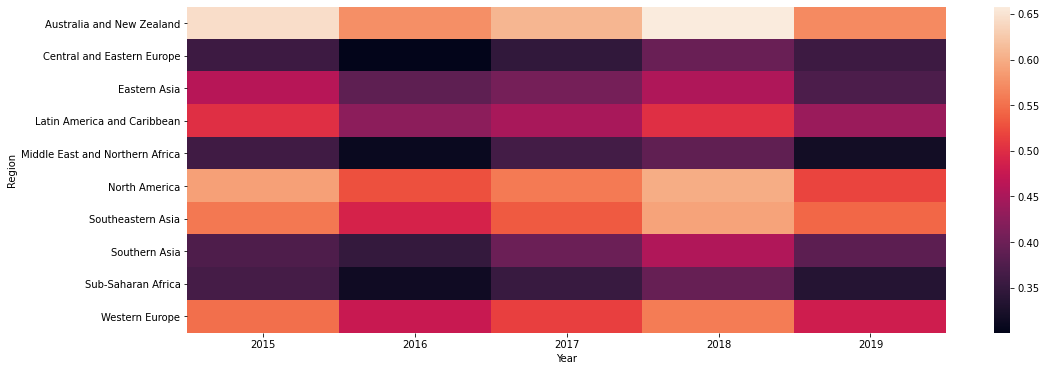

In [191]:
sns.heatmap(freedom_by_years)

Исходя из описания данных, метрика "Freedom" отражает среднее значение бинарных ответов на вопрос "Довольны ли вы своей свободой выбора в том, что вы хотите делать со своей жизнью".

На графике видно, что в 2019 и 2016 годаъ во всех регионах видно падение "свободы выбора". Это может быть связано с мировыми финансовыми кризисами в 2015-2016 годах, а позже в начале 2018 года.

Также можно сказать, что в Северной Америке и Юго-Восточной Азии эти колебания менее значительны, чем в остальных регионах.